# **Drift Detection and Visualization using Clustering**

## **1. Necessary imports** ##

In [1]:
import sys
sys.path.append('/Users/Kuba/Desktop/DriftDetectionWithExplainableAI')

from src.datasets import get_dataset
from src.clustering import ClusterBasedDriftDetector
from src.clustering import plot_clusters_by_class, plot_drift_clustered, plot_centers_shift

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/bachelor_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **2. Drift detection using Clustering**

TODO: jakis opis algorytmu

### **2.1. ClusterBasedDriftDetector exemplary usage**

In [2]:
size_of_box = 1000
generator = get_dataset("hyperplane_drift")
X, y = generator.generate(size_of_box, size_of_box, 3, 2)
half = len(X)//2

X_old, X_new = X.loc[:half-1], X.loc[half:]
y_old, y_new = y[:half], y[half:]

CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
CBDD.detect()

labels_old = CBDD.cluster_labels_old
labels_new = CBDD.cluster_labels_new

[  2 195  13  13]
[0 0 0 0]


### **2.2. Drift flag (whether drift was detected or not - only True and False are available)**

In [3]:
CBDD.drift_flag

True

We can also plot strength of the drift (i. e. how much sure we are that drift occured - value of weighted average)

In [4]:
CBDD.strength_of_drift

np.float64(0.9999999999771796)

### **2.3. Number of clusters before and after**

In [5]:
CBDD.number_of_clusters_old

8

In [6]:
CBDD.number_of_clusters_new

5

### **2.4. Descriptive statistics per cluster**

Values of max, mean, median, min and std for each cluster and feature before and after separately

In [7]:
CBDD.stats_combined

before                                                    \
                     X1                                                X2   
                    max      mean    median       min       std       max   
(cluster, id)                                                               
0              1.517599 -0.411360 -0.323062 -1.812862  0.670118 -0.024796   
1              1.581524 -0.564358 -0.564313 -1.829144  0.733877  1.761252   
2              1.169425 -1.067956 -1.073198 -1.830684  0.494738  0.044750   
3              1.645525 -1.036817 -1.107425 -1.813791  0.616968  1.760153   
4              1.728874  1.064555  1.081712 -0.744622  0.457698  1.676603   
5              1.687151  0.572423  0.621520 -0.768256  0.651144  1.750938   
6              1.684647  0.573771  0.611840 -1.735654  0.661015  0.079401   
7              1.716374  0.867162  0.979940 -1.772260  0.618868 -0.211093   
8                   NaN       NaN       NaN       NaN       NaN       NaN   
9                   NaN       NaN       NaN       NaN       NaN       NaN   
10                  NaN       NaN       NaN       NaN       NaN       NaN   
11                  NaN       NaN       NaN       NaN       NaN       NaN   
12                  NaN       NaN       NaN       NaN       NaN       NaN   

                                                       ...     after  \
                                                       ...        X2   
                   mean    median       min       std  ...       max   
(cluster, id)                                          ...             
0             -0.963858 -0.981850 -1.751580  0.496216  ...       NaN   
1              0.854399  0.820932 -0.100637  0.540402  ...       NaN   
2             -0.808673 -0.785099 -1.743384  0.484888  ...       NaN   
3              0.921788  0.933693  0.066665  0.525446  ...       NaN   
4              0.686573  0.606403 -0.268750  0.551140  ...       NaN   
5              0.920313  0.895438  0.101691  0.470613  ...       NaN   
6             -0.750762 -0.687076 -1.741383  0.534182  ...       NaN   
7             -1.002734 -1.047098 -1.750997  0.434497  ...       NaN   
8                   NaN       NaN       NaN       NaN  ...  1.700353   
9                   NaN       NaN       NaN       NaN  ...  1.750938   
10                  NaN       NaN       NaN       NaN  ...  0.835382   
11                  NaN       NaN       NaN       NaN  ...  1.761252   
12                  NaN       NaN       NaN       NaN  ...  1.760153   

                                                                           \
                                                             X3             
                   mean    median       min       std       max      mean   
(cluster, id)                                                               
0                   NaN       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   
5                   NaN       NaN       NaN       NaN       NaN       NaN   
6                   NaN       NaN       NaN       NaN       NaN       NaN   
7                   NaN       NaN       NaN       NaN       NaN       NaN   
8             -0.118989 -0.149708 -1.698019  0.870195 -0.033200 -0.998853   
9             -0.179282 -0.183412 -1.722066  0.834259  1.720843  0.888913   
10            -1.116609 -1.220840 -1.751580  0.464569  1.703813  0.051259   
11             0.538073  0.631246 -1.730691  0.866550  0.225592 -0.912726   
12             0.469978  0.567818 -1.712656  0.888432  1.731830  0.825497   

                                             
                                             
                 median       min       std  
(cluster, id)                     

Relative change of descriptive statistics per cluster

In [8]:
CBDD.stats_shifts

{0: {'X1': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X2': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X3': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan}},
 1: {'X1': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X2': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X3': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan}},
 2: {'X1': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X2': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X3': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan}},
 3: {'X1': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X2': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X3': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan}},
 4: {'X1': {'max': nan, 'mean': nan, 'median': nan, 'min': nan, 'std': nan},
  'X2': {'max': nan

### **2.5. Cluster shifts**

How much (in terms of euclidean distance) the clusters shifted. In case of appearing/disappearing clusters - proper annotation is made. Two metrics are saved - euclidean distance (in a straight line) and distance per feature (multidimensional shift per feature separately to preserve all information).

In [9]:
CBDD.cluster_shifts

{np.int64(0): 'disappeared',
 np.int64(1): 'disappeared',
 np.int64(2): 'disappeared',
 np.int64(3): 'disappeared',
 np.int64(4): 'disappeared',
 np.int64(5): 'disappeared',
 np.int64(6): 'disappeared',
 np.int64(7): 'disappeared',
 np.int64(8): 'appeared',
 np.int64(9): 'appeared',
 np.int64(10): 'appeared',
 np.int64(11): 'appeared',
 np.int64(12): 'appeared'}

### **2.6. Average distance to the center**

**Average distance to the clusters in first (old) data block:**

In [10]:
CBDD.avg_distance_old

{np.int64(0): np.float64(0.919806177378436),
 np.int64(1): np.float64(0.9556320447112702),
 np.int64(2): np.float64(0.8050212780236642),
 np.int64(3): np.float64(0.8777378249251517),
 np.int64(4): np.float64(0.8172497874578011),
 np.int64(5): np.float64(0.892253593838896),
 np.int64(6): np.float64(0.9135034194807842),
 np.int64(7): np.float64(0.8451176020588214),
 np.int64(8): None,
 np.int64(9): None,
 np.int64(10): None,
 np.int64(11): None,
 np.int64(12): None}

**Average distance to the clusters in second (new) data block:**

In [11]:
CBDD.avg_distance_new

{np.int64(8): np.float64(1.0643461581190103),
 np.int64(9): np.float64(1.0326447093836248),
 np.int64(10): np.float64(1.1029657431012656),
 np.int64(11): np.float64(1.2597783377797127),
 np.int64(12): np.float64(1.2733308375545644),
 np.int64(0): None,
 np.int64(1): None,
 np.int64(2): None,
 np.int64(3): None,
 np.int64(4): None,
 np.int64(5): None,
 np.int64(6): None,
 np.int64(7): None}

**Relative change in average distance to the center in each cluster between data blocks**

In [12]:
CBDD.avg_distance_shift

{np.int64(0): None,
 np.int64(1): None,
 np.int64(2): None,
 np.int64(3): None,
 np.int64(4): None,
 np.int64(5): None,
 np.int64(6): None,
 np.int64(7): None,
 np.int64(8): None,
 np.int64(9): None,
 np.int64(10): None,
 np.int64(11): None,
 np.int64(12): None}

### **2.7. Dictionary with all True/False flags**

In [13]:
CBDD.drift_details

{np.int64(0): {'nr_of_clusters': True,
  'centroid_shift': {np.int64(0): True,
   np.int64(1): True,
   np.int64(2): True,
   np.int64(3): True,
   np.int64(8): True,
   np.int64(9): True,
   np.int64(10): True},
  'desc_stats_changes': {np.int64(0): {'X1': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    'X2': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    'X3': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True}},
   np.int64(1): {'X1': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    'X2': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    'X3': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True}},
   np.int64(2): {'X1': {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    'X2': {'max':

## **3. Drift visualization**

<!-- cos tam opisac o tym ze pca jest zrobione -->

### **3.1. Drift clustered - all classes together**

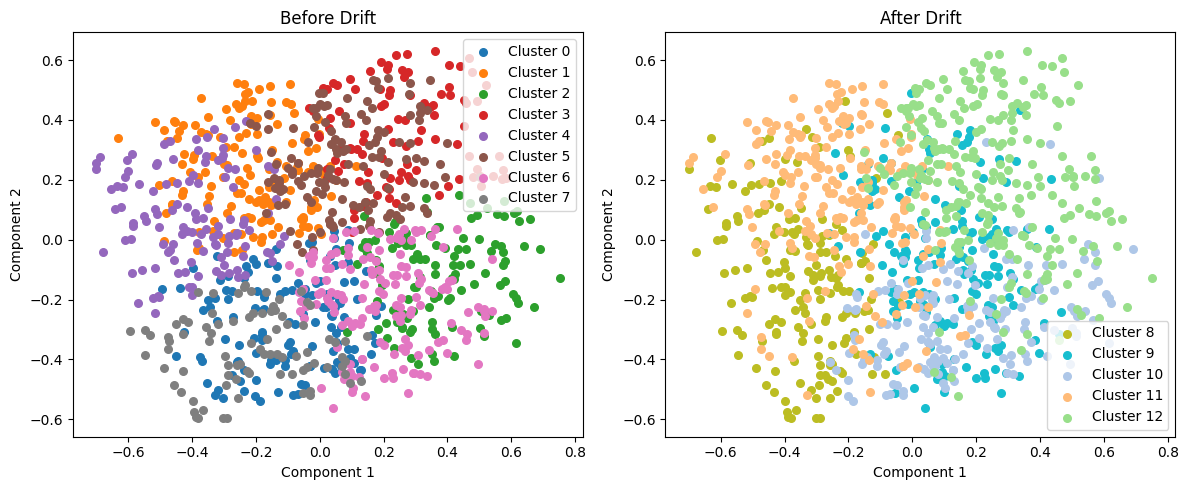

In [14]:
plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)

### **3.2. Drift clustered - each class separately**

This ensures better readability than previous visualization

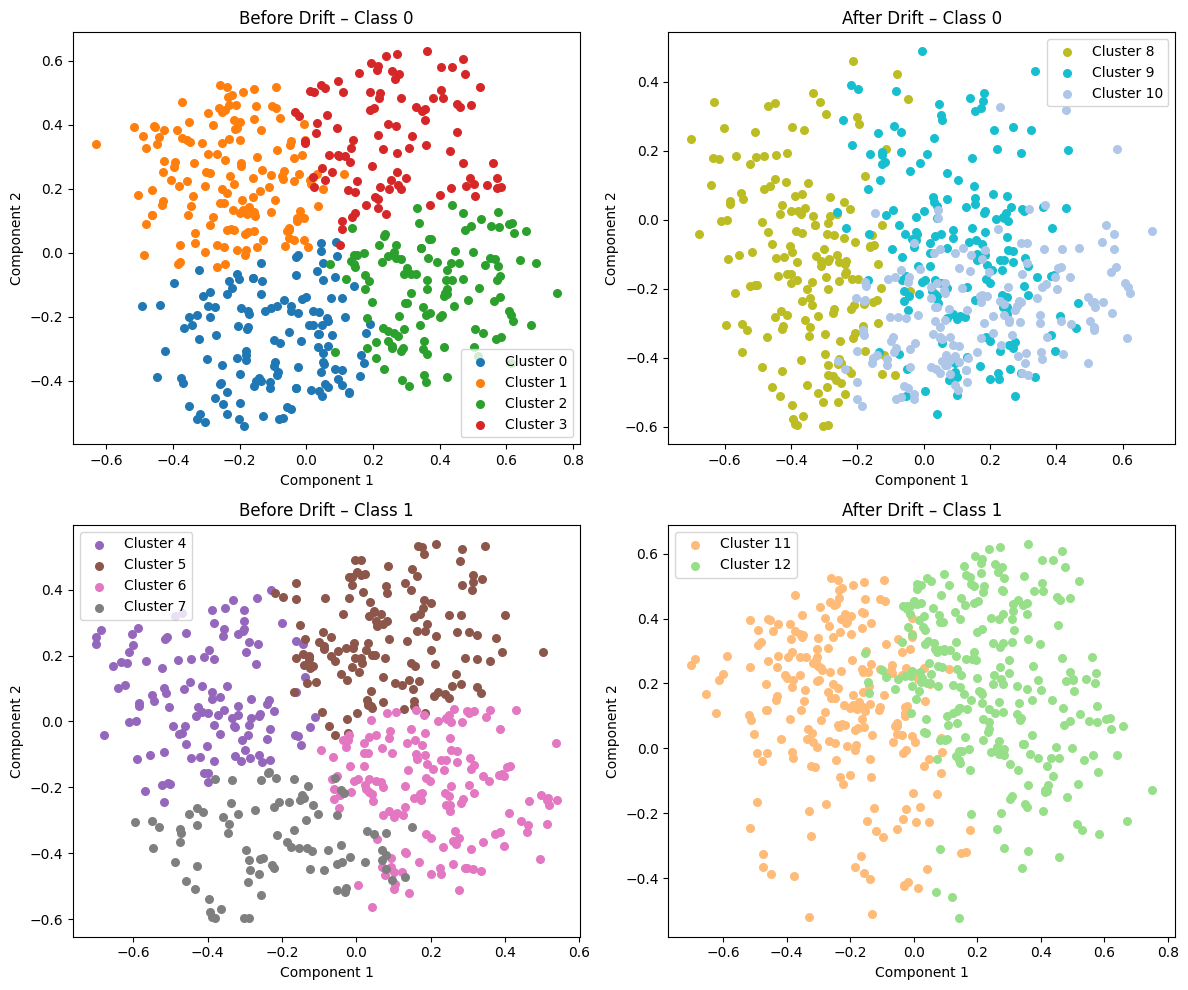

In [15]:
plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)

### **3.3. Plotting how much did clusters shift between data blocks**

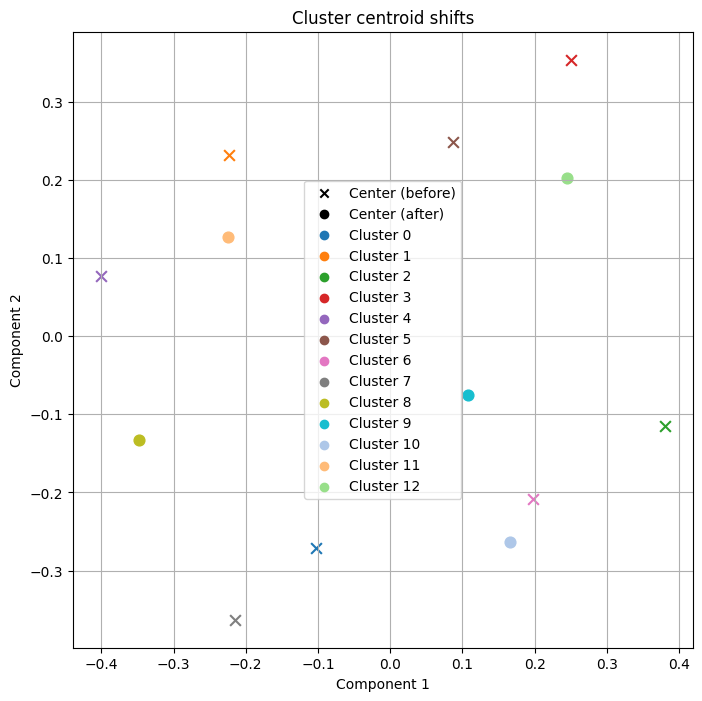

In [16]:
plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

## **4. Experiments** ##

In [17]:
def run_experiment(experiment_fn):
    def wrapper(size_of_block, *args, **kwargs):

        X, y = experiment_fn(size_of_block, *args, **kwargs)

        X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
        y_old, y_new = y[:size_of_block], y[size_of_block:]

        CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
        CBDD.detect()

        labels_old = CBDD.cluster_labels_old
        labels_new = CBDD.cluster_labels_new

        print(f"Drift detected?: {CBDD.drift_flag}, strength of drift: {CBDD.strength_of_drift}")

        plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

    return wrapper

@run_experiment
def run_experiments_hyperplane(size_of_block, *args, **kwargs):
    generator = get_dataset("hyperplane_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        *args,
        **kwargs
    )

#### **4.1. Hyperplane**

**1. Hyperplane 2D**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[ 2 40  6  4]
[0 0 2 4]
Drift detected?: True, strength of drift: 0.8874999999764062


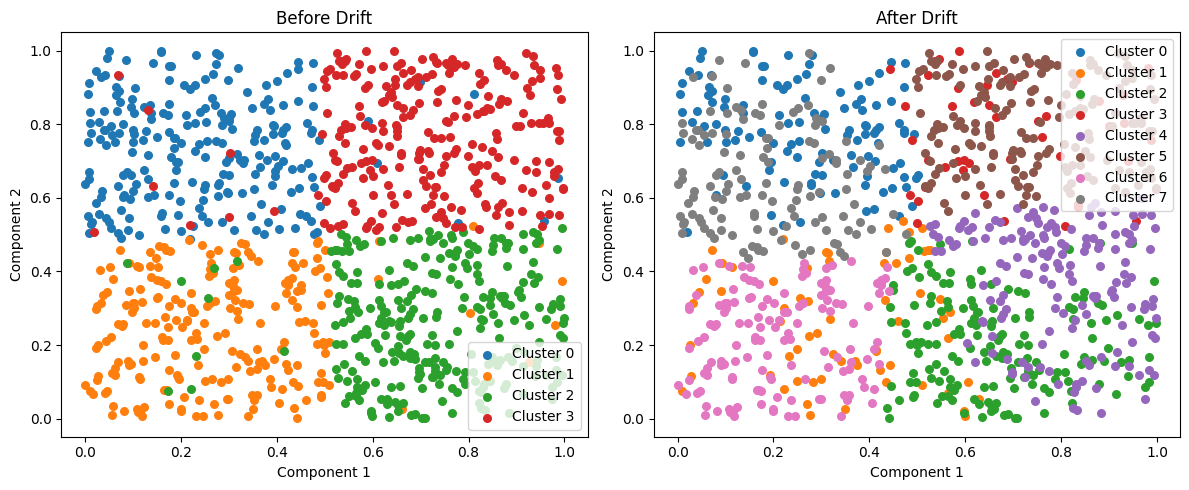

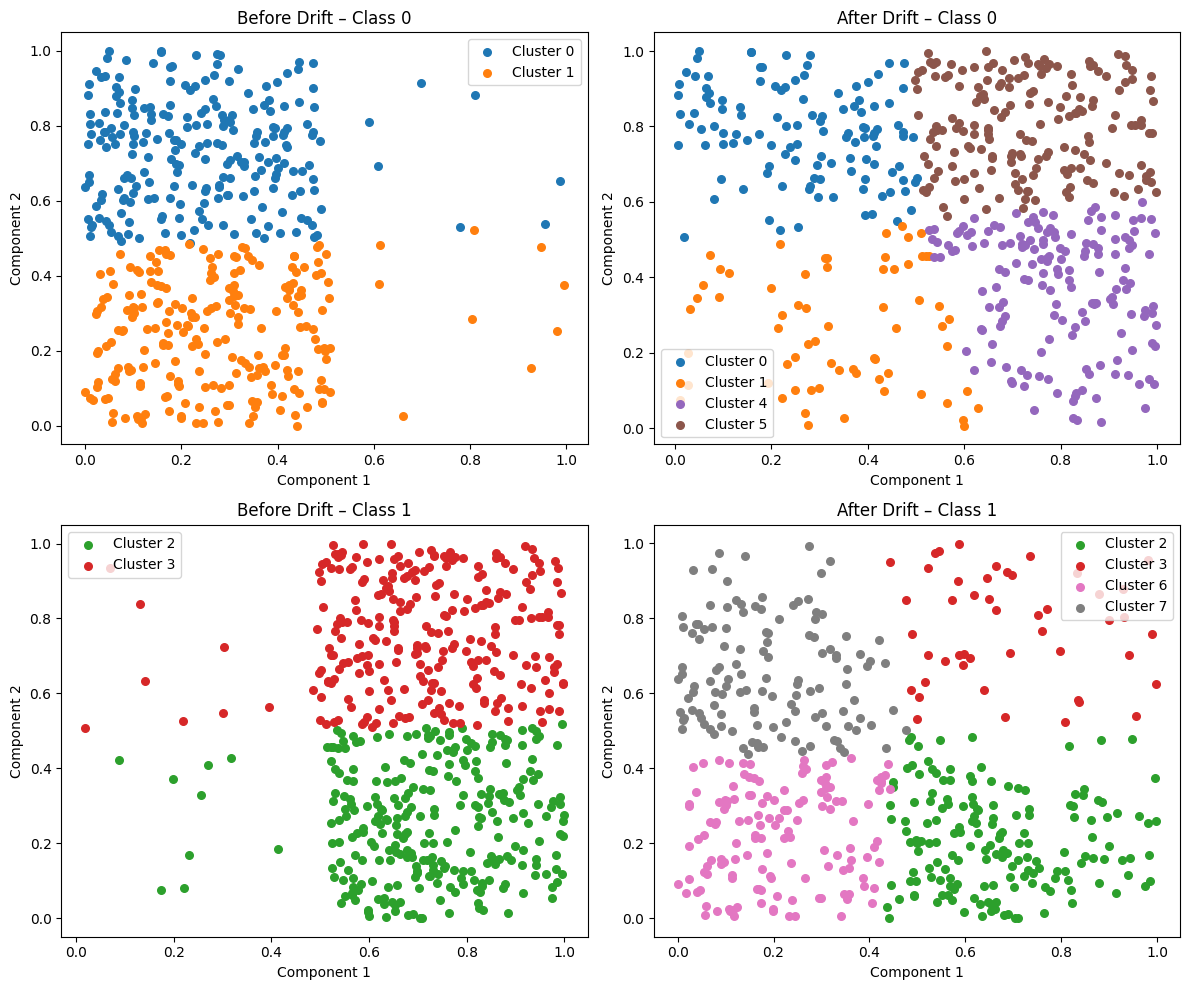

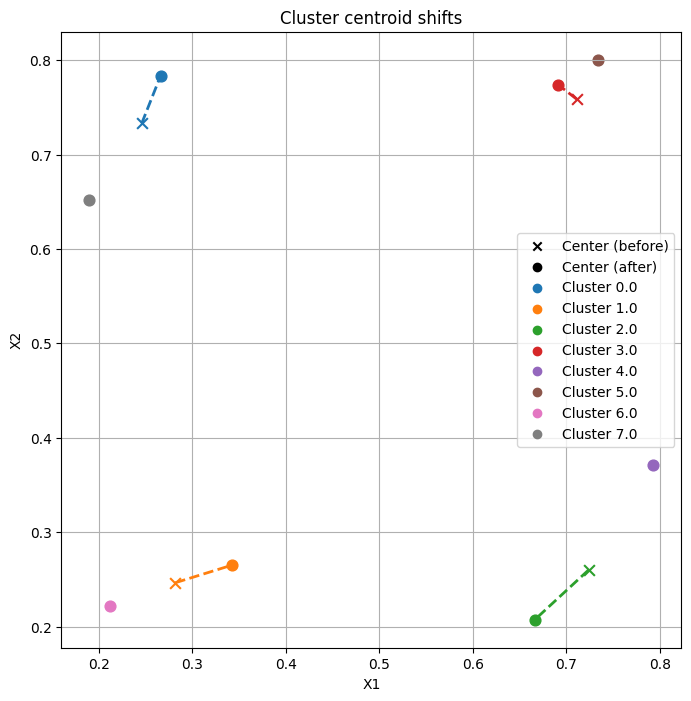

In [11]:
run_experiments_hyperplane(1000, n_features=2, n_drift_features=2)

**2. Hyperplane 3D only with relevant features**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 180  12  12]
[0 0 0 0]
Drift detected?: True, strength of drift: 0.9999999999769444


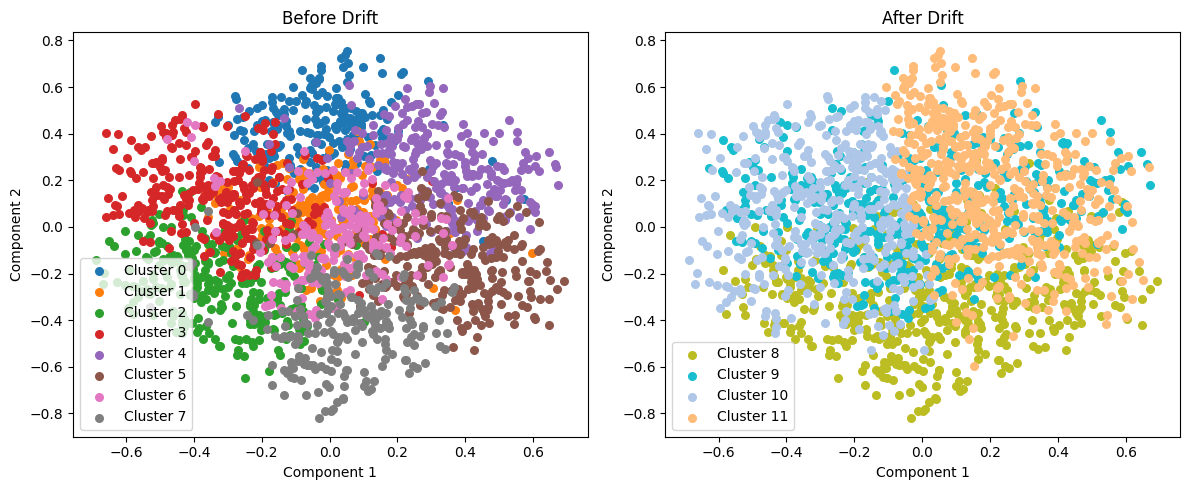

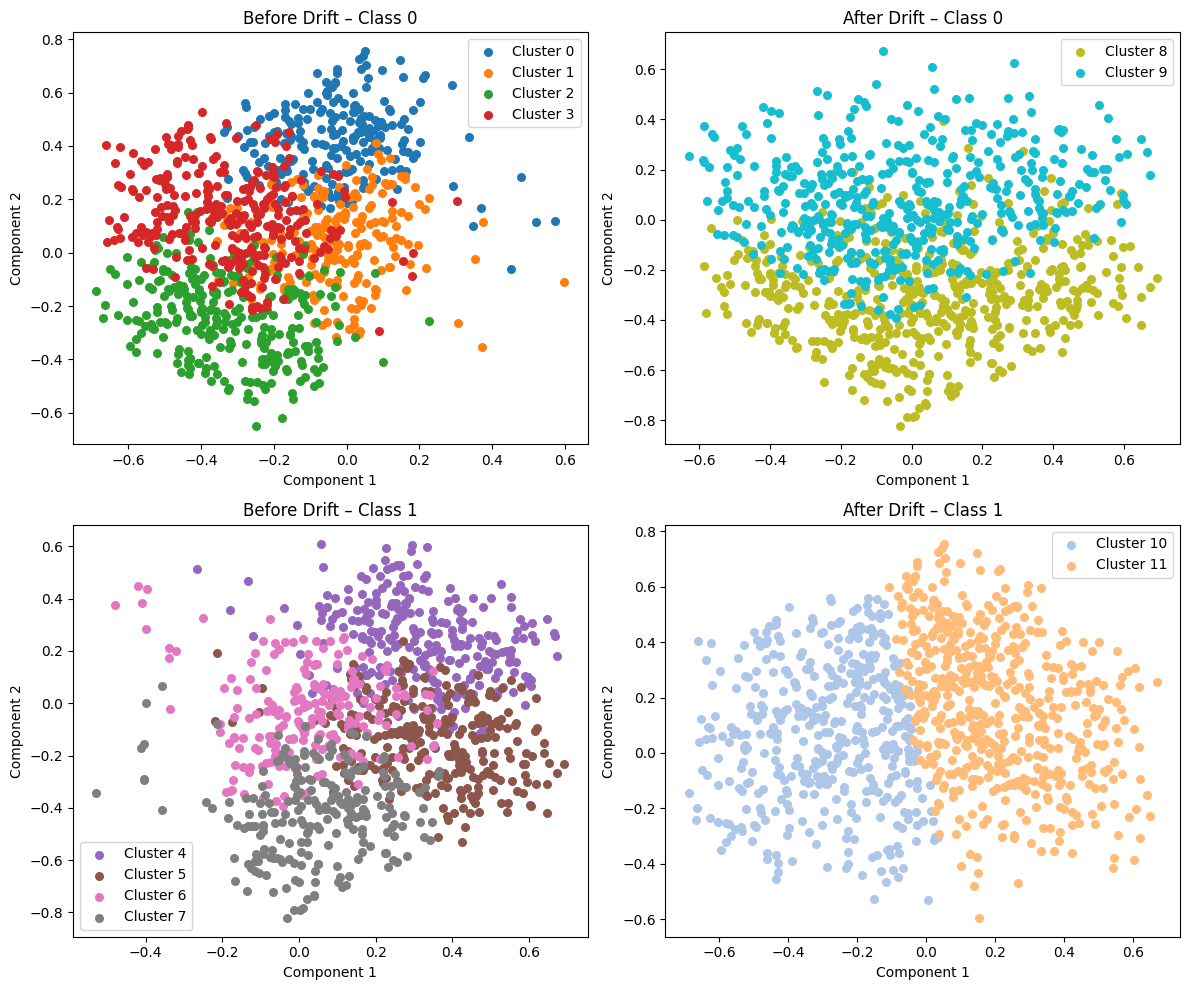

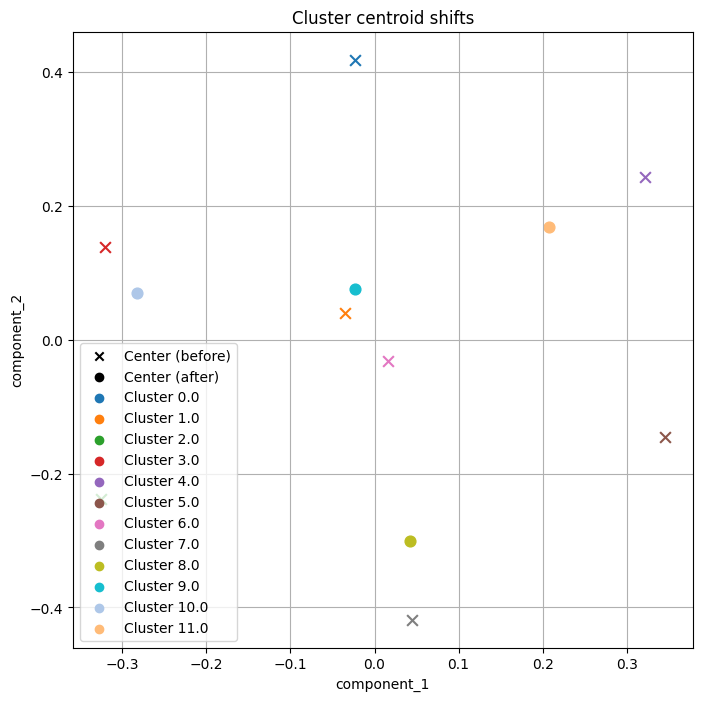

In [12]:
run_experiments_hyperplane(2000, n_features=3, n_drift_features=3)

**3. Hyperplane 3D - not all features drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 195  13  13]
[0 0 0 0]
Drift detected?: True, strength of drift: 0.9999999999771796


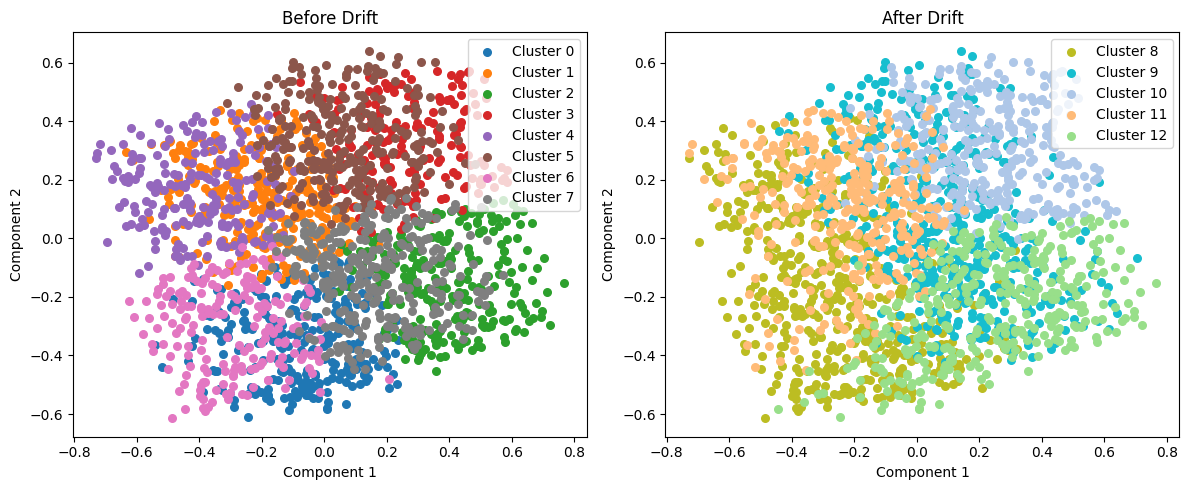

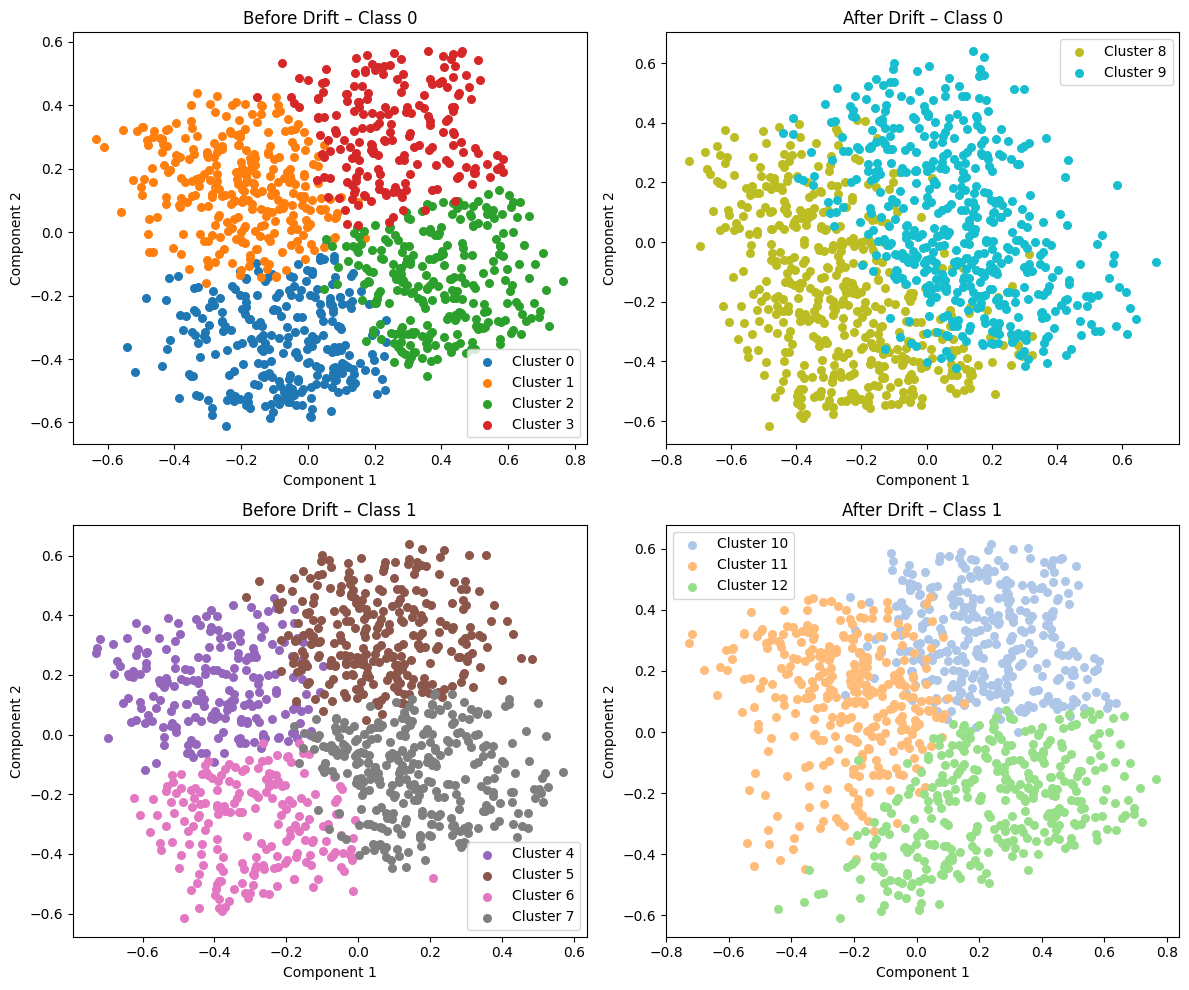

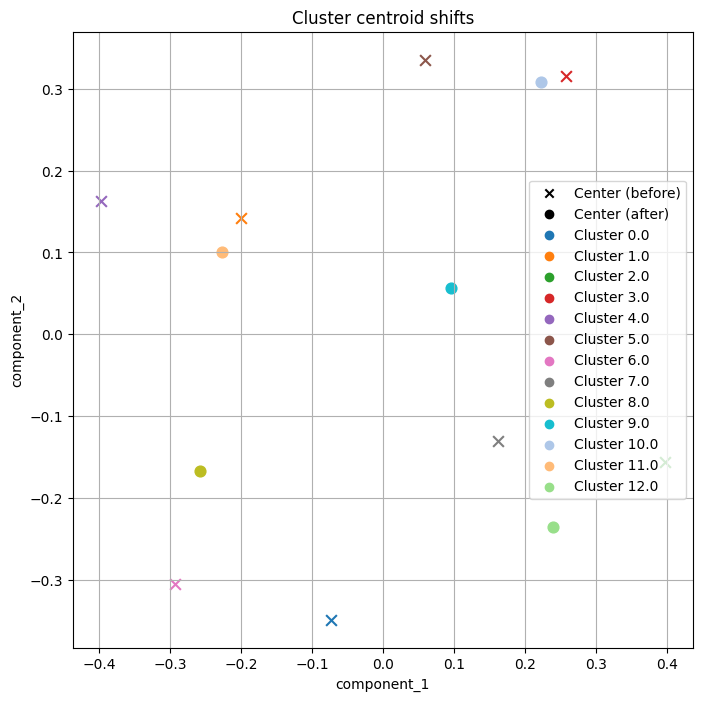

In [13]:
run_experiments_hyperplane(2000, n_features=3, n_drift_features=2)

**4. Hyperplane multidimensional - not all features drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 160   7   6]
[ 0 15  0  1]
Drift detected?: True, strength of drift: 0.9642857142607877


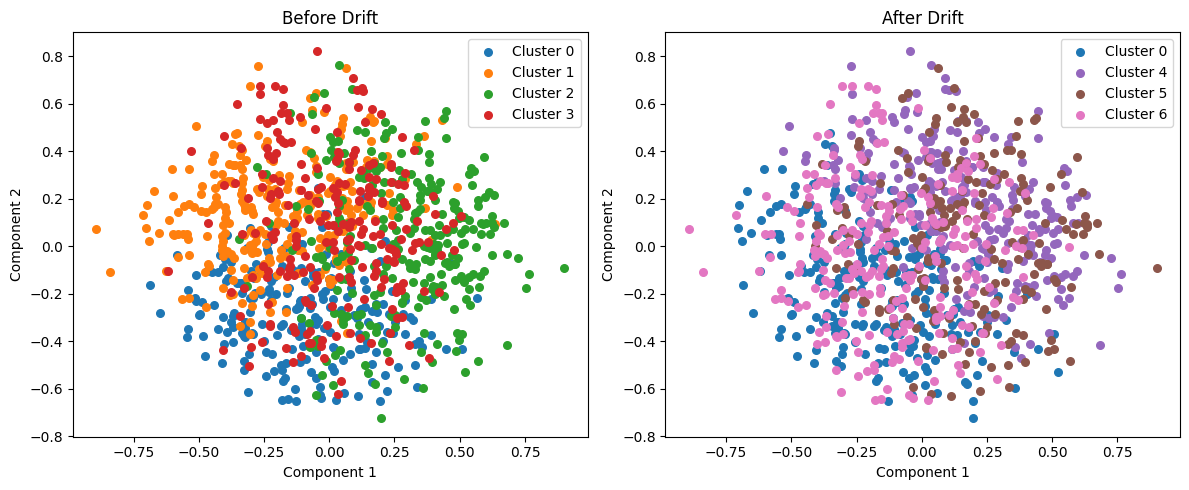

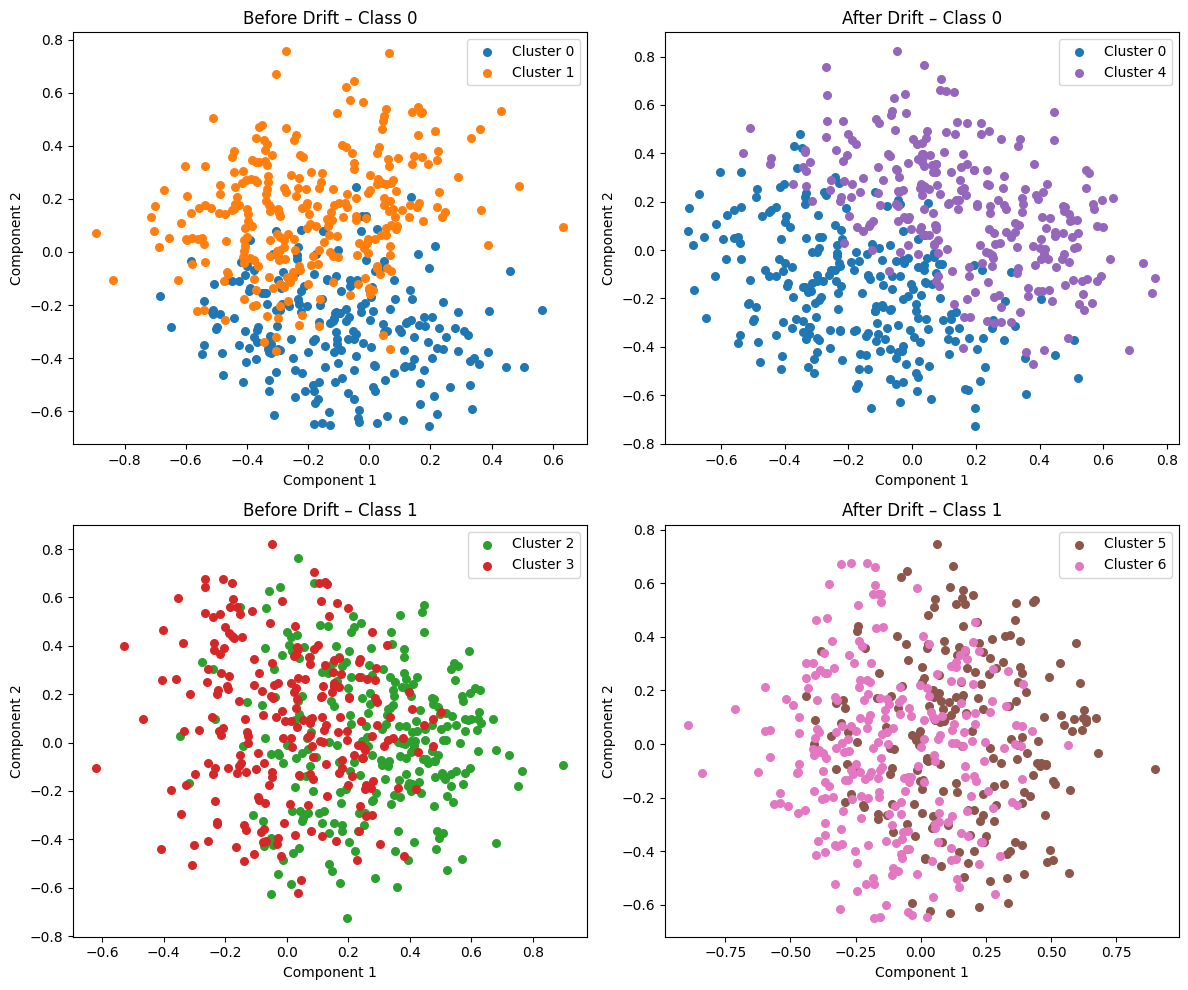

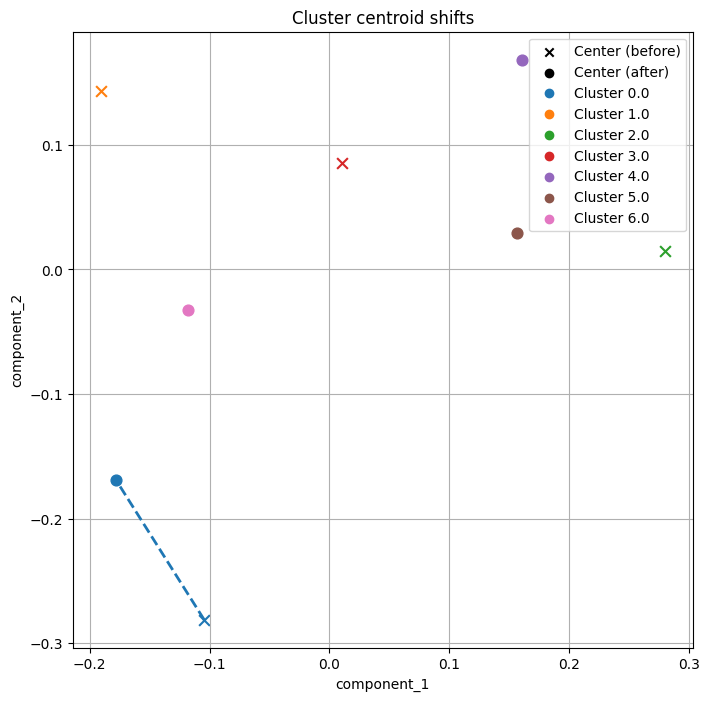

In [14]:
run_experiments_hyperplane(1000, n_features=5, n_drift_features=2)

### **4.2. SEA**

**1. SEA - all features (including the irrelevant one)**

In [15]:
@run_experiment
def run_experiments_sea(size_of_block, *args, **kwargs):
    generator = get_dataset("sea_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        *args, 
        **kwargs
    )

[0 0 2 2]
[2 0 2 2]
Drift detected?: False, strength of drift: 0.174999999995625


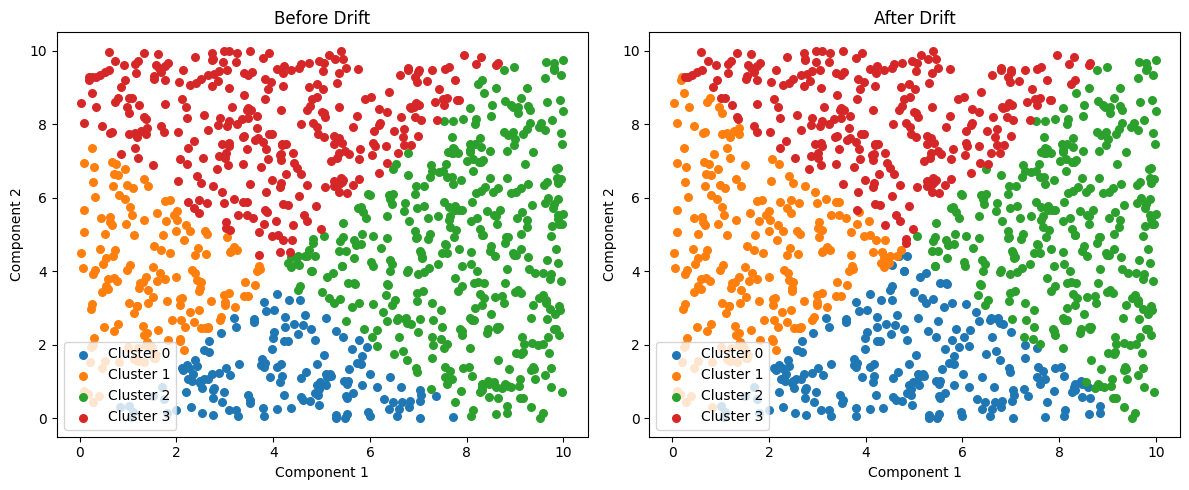

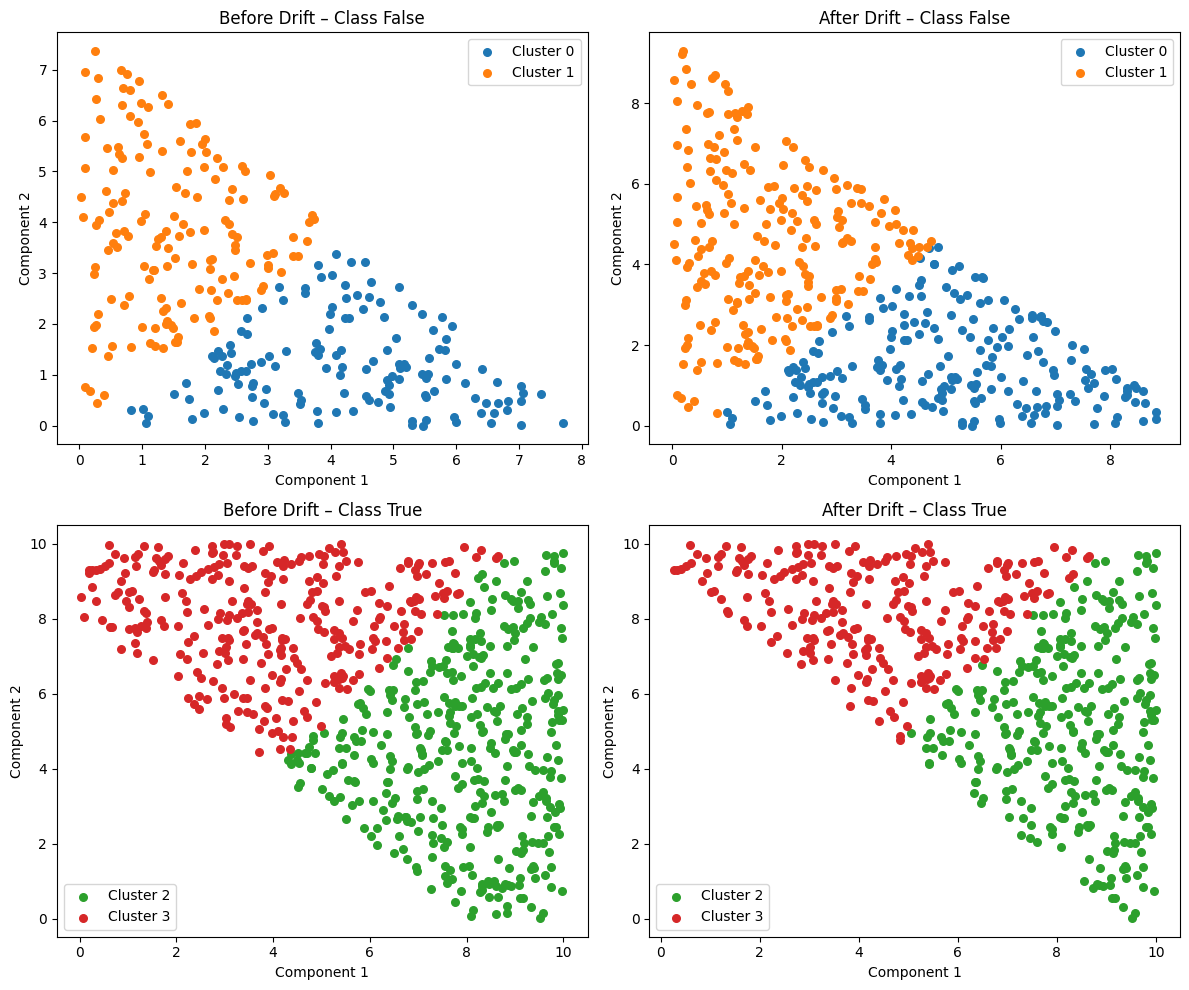

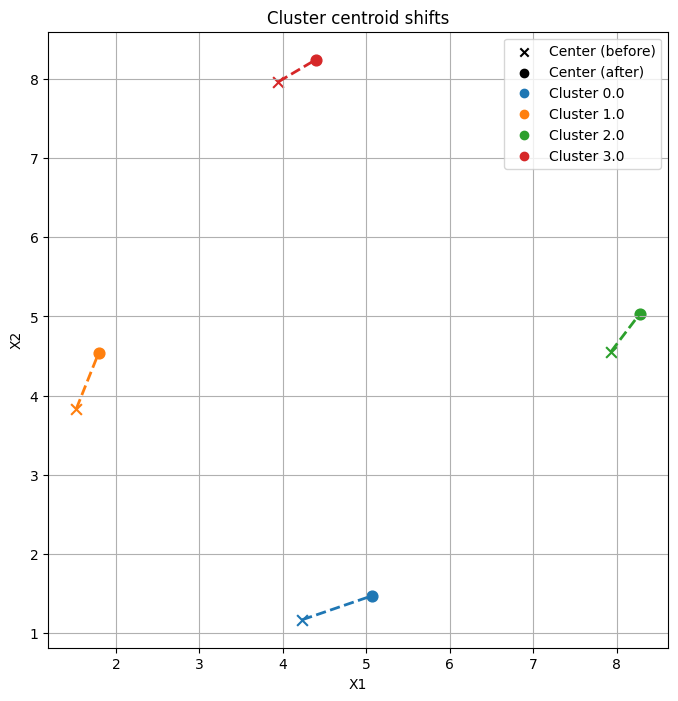

In [16]:
run_experiments_sea(1000, n_features=2)

**2. SEA but only with all features**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[ 2 30  6  3]
[0 0 1 4]
Drift detected?: True, strength of drift: 0.9071428571183504


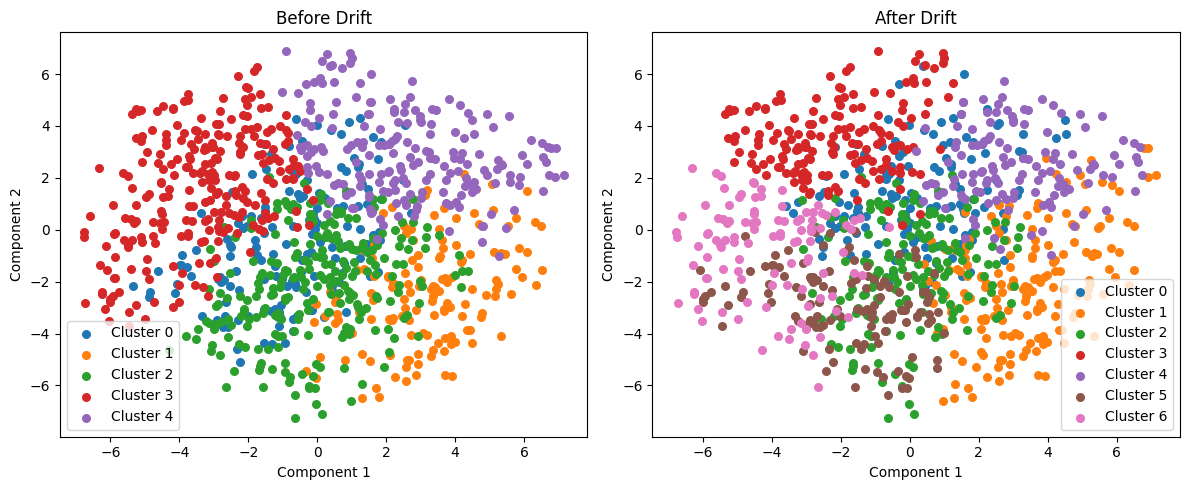

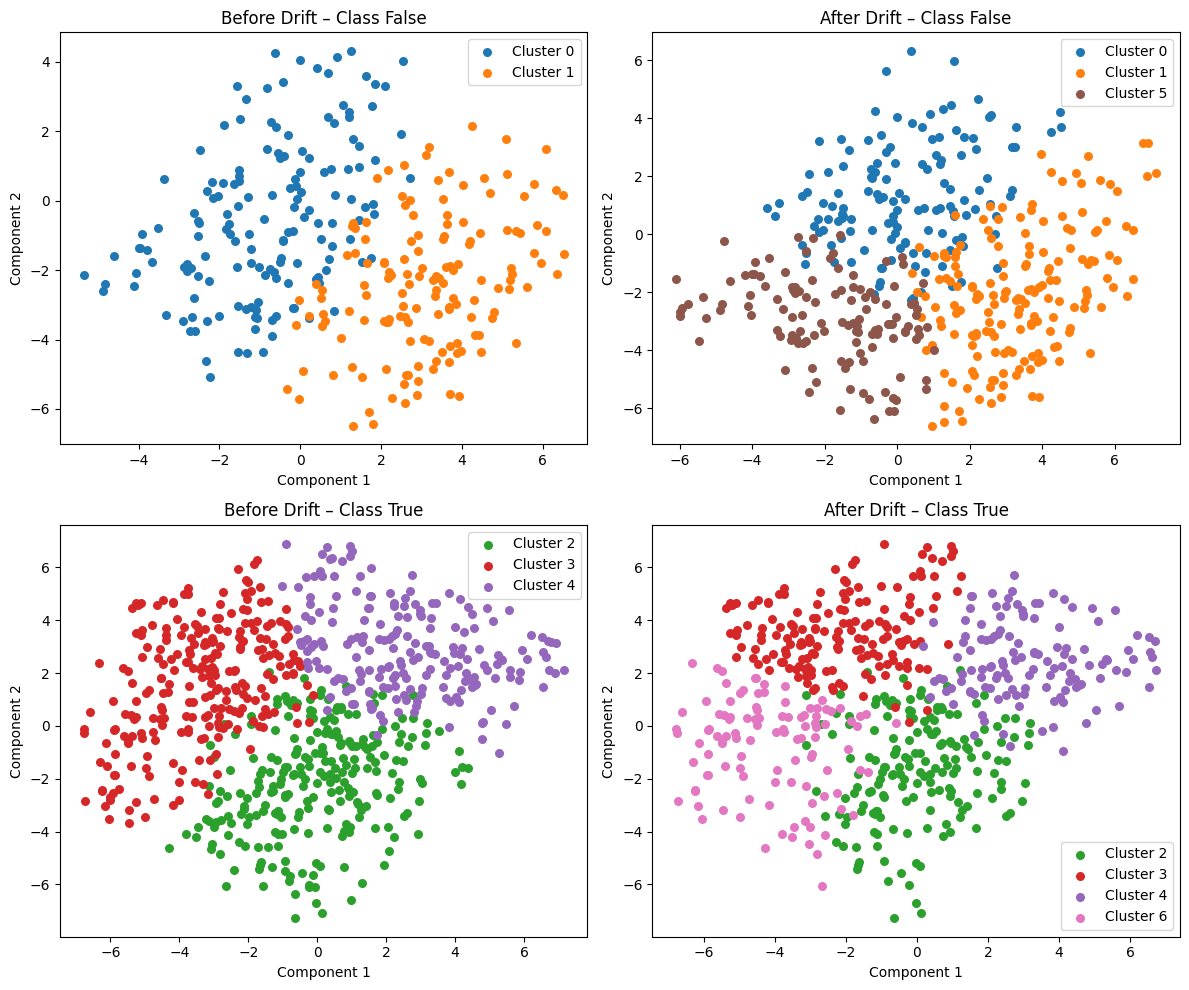

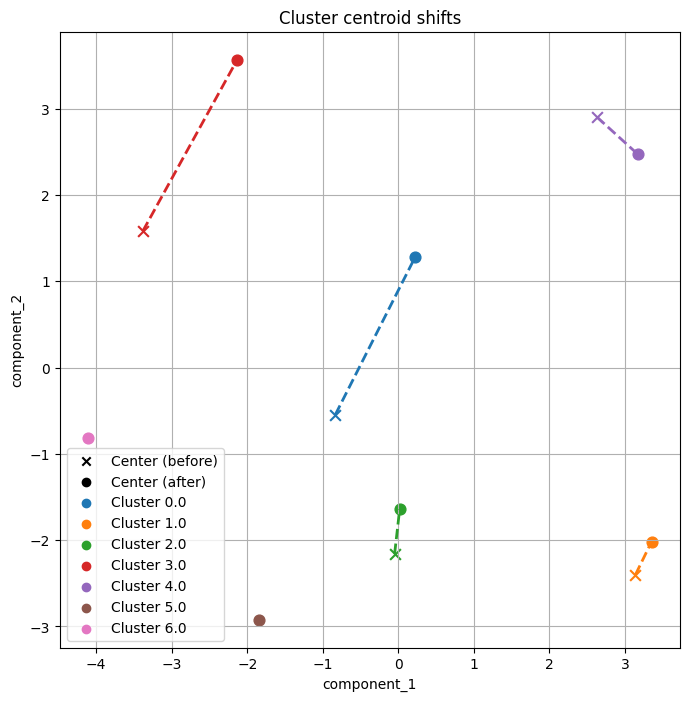

In [25]:
run_experiments_sea(1000, 3)

### **4.3. RBF**

In [17]:
@run_experiment
def run_experiments_random_rbf(size_of_block, *args, **kwargs):
    generator = get_dataset("random_rbf_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        *args, 
        **kwargs
    )

In [27]:
# run_experiments_random_rbf(1000, 2)

### **4.4. SDBM**


In [32]:
def run_experiment2(experiment_fn):
    def wrapper(size_of_block, *args, **kwargs):

        X, y = experiment_fn(size_of_block, *args, **kwargs)

        X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
        y_old, y_new = y[:size_of_block], y[size_of_block:]

        CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
        CBDD.detect()

        labels_old = CBDD.cluster_labels_old
        labels_new = CBDD.cluster_labels_new
        print(CBDD.centers_old)
        print(CBDD.centers_new)

        print(f"Drift detected?: {CBDD.drift_flag}, strength of drift: {CBDD.strength_of_drift}")

        plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

    return wrapper

In [33]:
@run_experiment2
def run_experiments_sdbm(size_of_block, **kwargs):
    generator = get_dataset("rbf_drift")

    return generator.generate(
        n_samples_before = size_of_block,
        n_samples_after = size_of_block,
        kwargs=kwargs
    )


**1. SDBM with drift_width=0**

[  2 160   8   8]
[0 0 0 0]
{np.int64(0): array([-0.94697048,  0.98531957, -0.98487079,  0.96980732]), np.int64(1): array([ 1.01983293, -0.98329609,  0.9896753 , -1.02281129]), np.int64(2): array([-0.9562982 , -0.99632763,  0.99136204,  0.93230516]), np.int64(3): array([ 1.02551119,  0.97868112, -0.98025111, -1.02167891]), np.int64(4): None, np.int64(5): None, np.int64(6): None, np.int64(7): None}
{np.int64(4): array([ 1.01892208,  0.96434393, -0.99000035, -1.0322182 ]), np.int64(5): array([-0.95279341, -0.97465101,  1.00490177,  0.9575483 ]), np.int64(6): array([ 1.0108419 , -0.98597284,  1.00393407, -1.01646504]), np.int64(7): array([-0.94919028,  0.97791135, -0.97098354,  0.93484152]), np.int64(0): None, np.int64(1): None, np.int64(2): None, np.int64(3): None}
Drift detected?: True, strength of drift: 0.9999999999754688


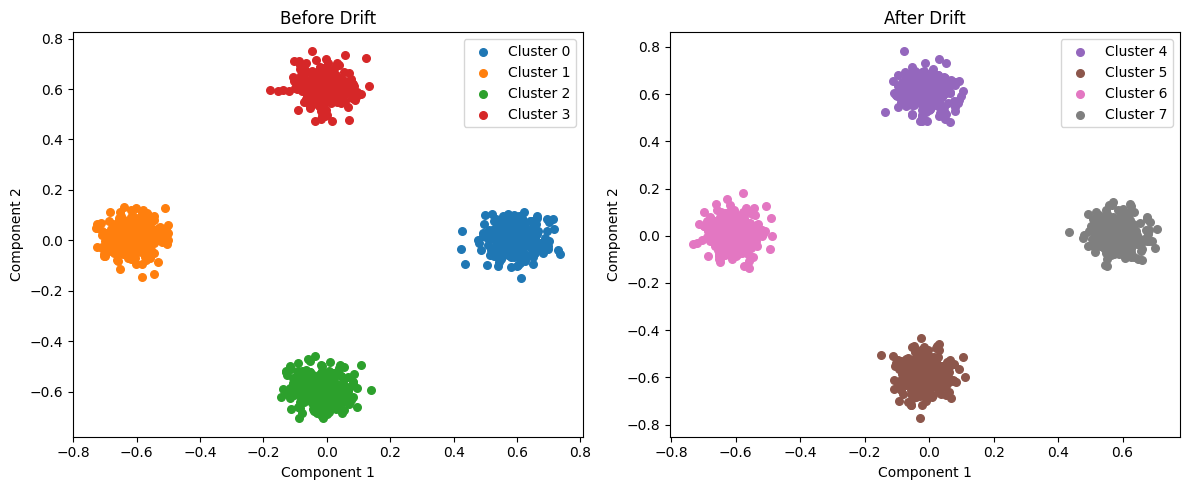

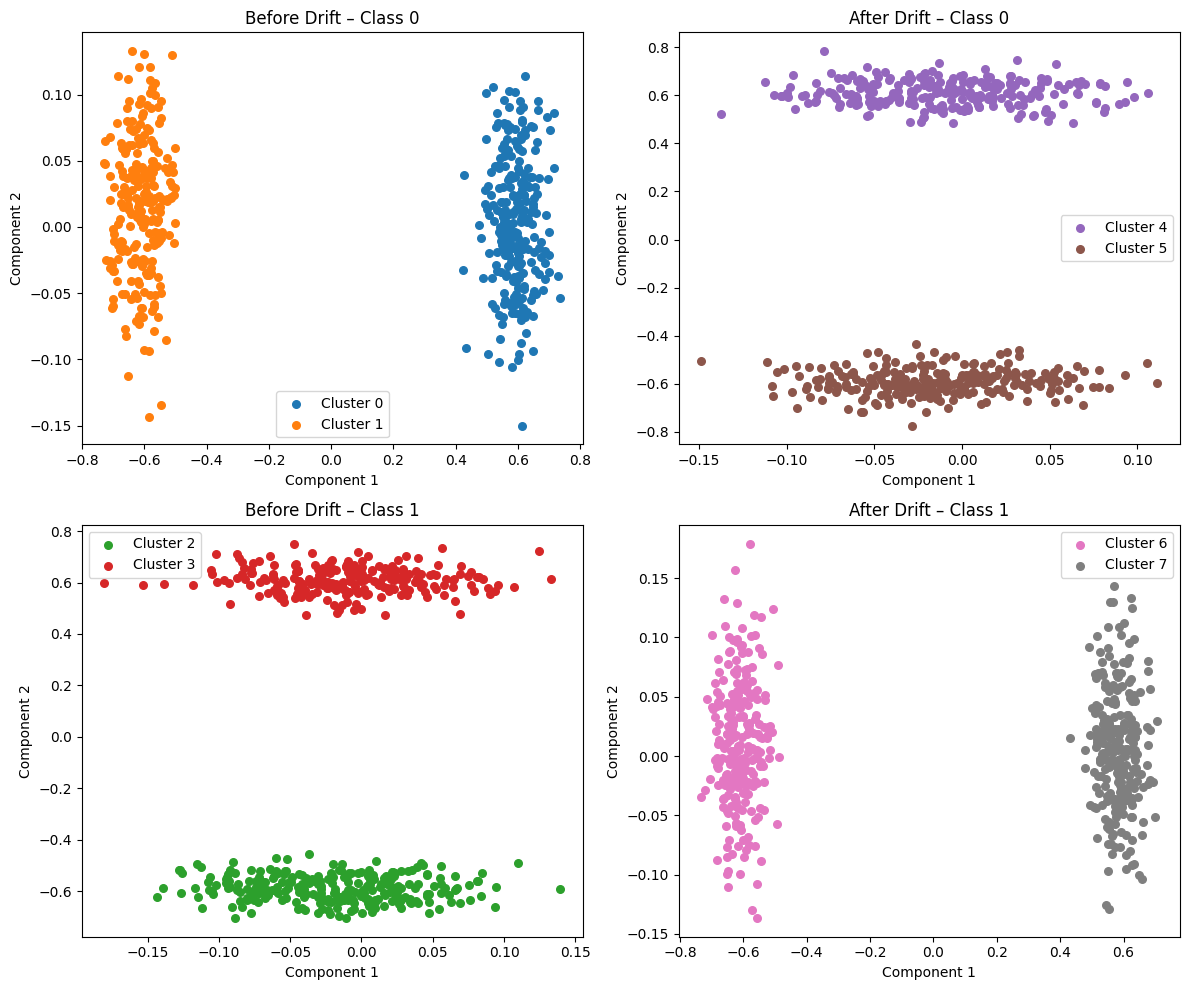

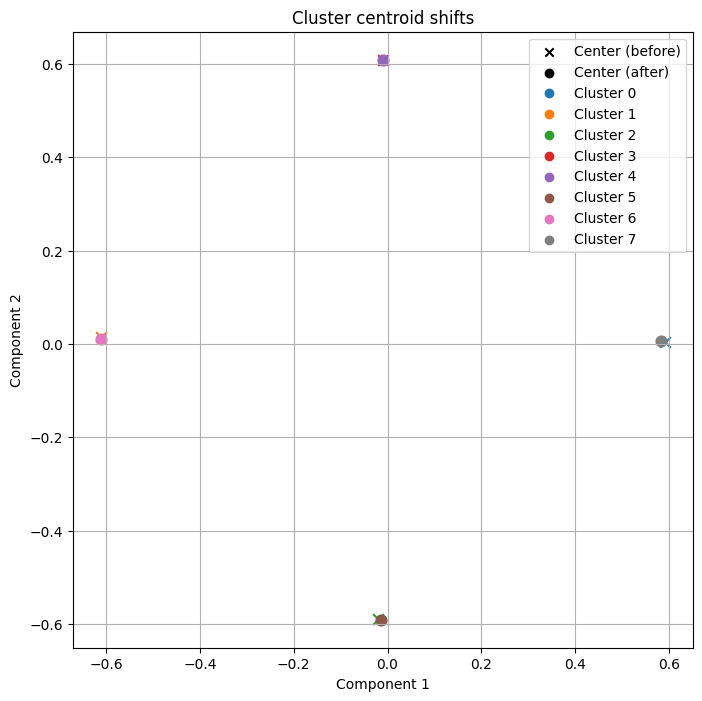

In [34]:
run_experiments_sdbm(1000)

### **4.5. Controlled Concept Drift**

In [24]:
@run_experiment2
def run_experiments_controlled_concept_drift(size_of_block, n_features, n_drift_features):
    generator = get_dataset("linear_weight_inversion_drift")

    return generator.generate(
        size_of_block, 
        size_of_block, 
        n_features, 
        n_drift_features
    )

**1. 2D Custom Concept Drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 110  11  11]
[0 0 0 0]
{np.float64(0.0): array([-0.83058355, -0.16723955]), np.float64(1.0): array([-1.2693987 ,  0.95359391]), np.float64(2.0): array([ 0.51278371, -1.16493504]), np.float64(3.0): array([-1.03547696, -1.27226303]), np.float64(4.0): array([-0.10947536,  1.06001247]), np.float64(5.0): array([1.15172134, 0.09157232]), np.float64(6.0): None, np.float64(7.0): None, np.float64(8.0): None, np.float64(9.0): None, np.float64(10.0): None}
{np.float64(6.0): array([0.92495087, 0.94213751]), np.float64(7.0): array([ 1.06466298, -0.47675701]), np.float64(8.0): array([-0.51451113,  1.13543642]), np.float64(9.0): array([ 3.4935411e-04, -1.1724691e+00]), np.float64(10.0): array([-1.0900353 ,  0.04310906]), np.float64(0.0): None, np.float64(1.0): None, np.float64(2.0): None, np.float64(3.0): None, np.float64(4.0): None, np.float64(5.0): None}
Drift detected?: True, strength of drift: 0.999999999976591


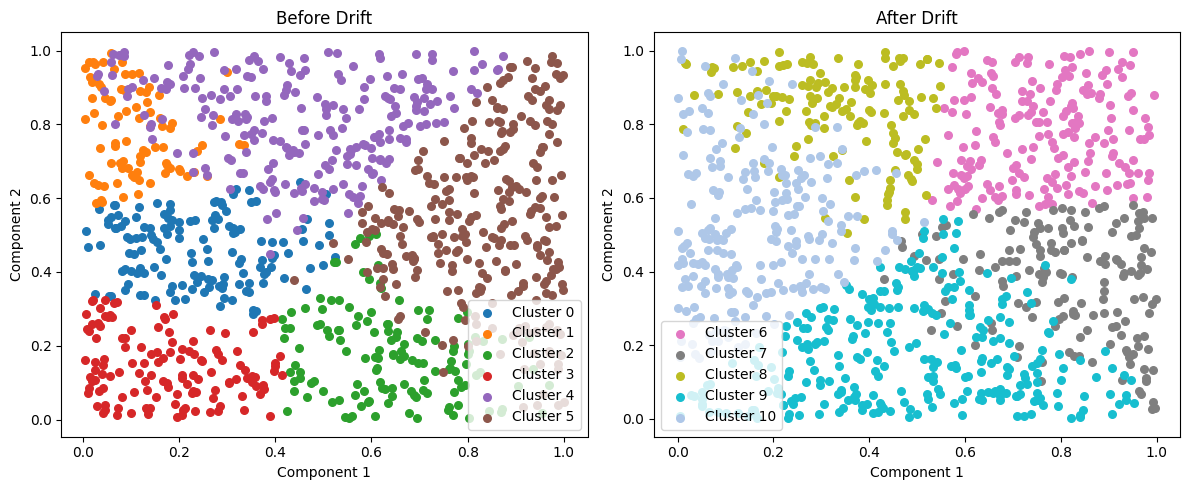

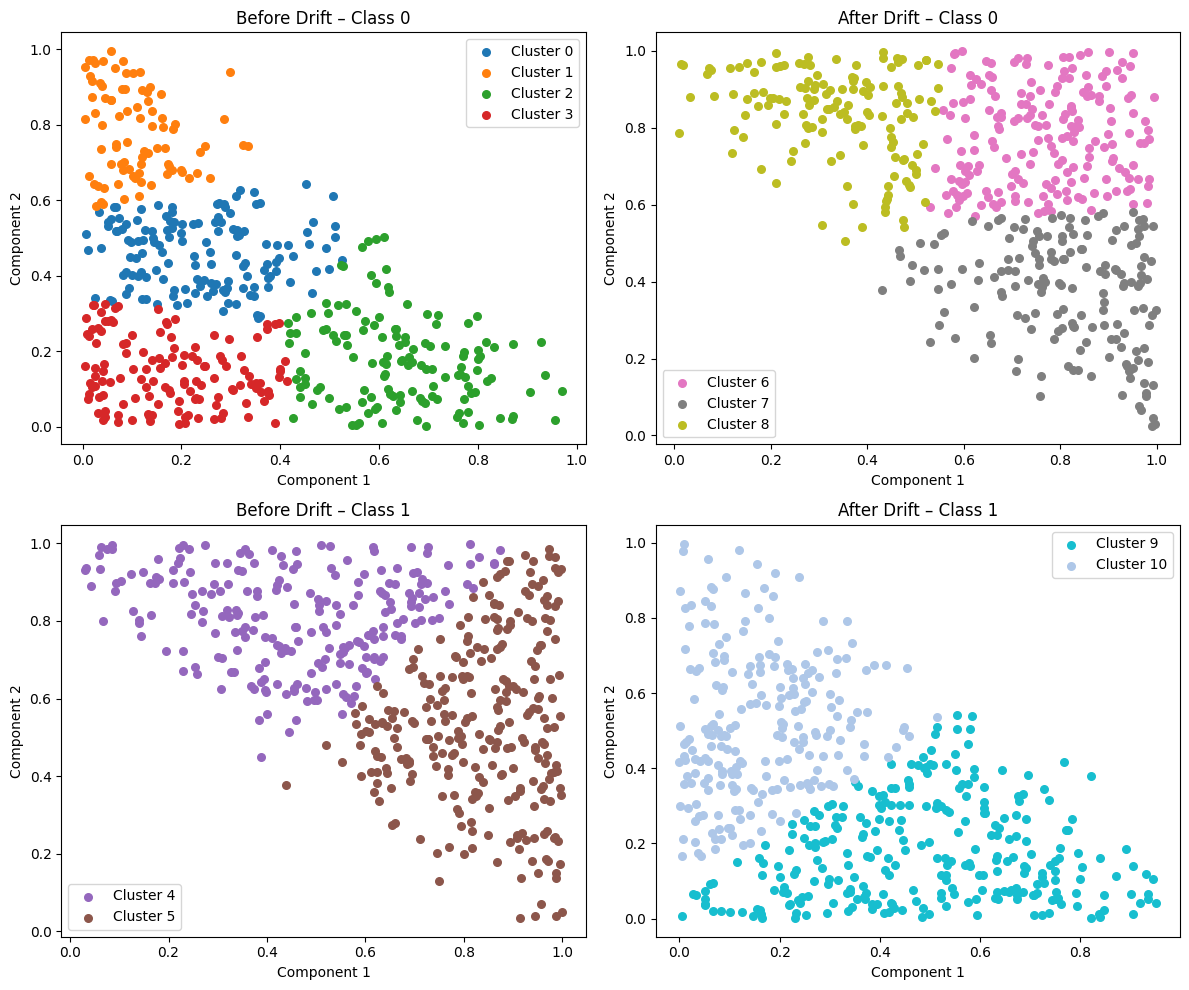

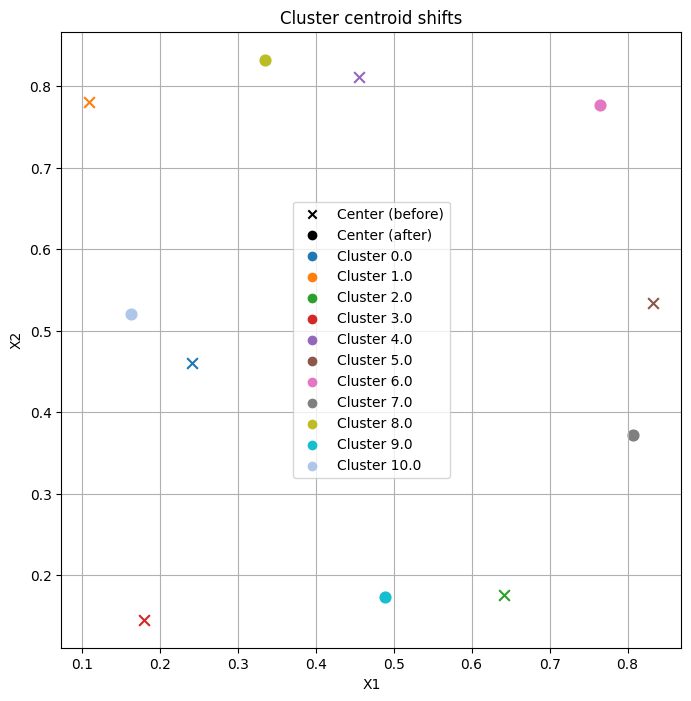

In [25]:
run_experiments_controlled_concept_drift(1000, 2, 2)

**2. Higher Dimensions Custom Concept Drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 133   7   6]
[0 7 0 1]
{np.float64(0.0): array([-0.34353504, -1.03212262, -0.01274769, -0.2807745 ]), np.float64(1.0): array([-0.54557864,  0.44379787, -0.92333755, -0.48876697]), np.float64(2.0): array([-0.29545489,  0.7747544 ,  0.23328306,  0.76687209]), np.float64(3.0): array([1.03539675, 0.05100744, 0.53127994, 0.00846064]), np.float64(4.0): None, np.float64(5.0): None, np.float64(6.0): None}
{np.float64(2.0): array([-0.55794466,  0.41164856,  0.88849534,  0.35730744]), np.float64(4.0): array([ 0.54656946,  0.53719062, -0.84592521,  0.35077221]), np.float64(5.0): array([ 0.20433619,  0.28723885, -0.04159823, -1.09708599]), np.float64(6.0): array([-0.27205744, -1.05858365,  0.0086939 ,  0.3637704 ]), np.float64(0.0): None, np.float64(1.0): None, np.float64(3.0): None}
Drift detected?: True, strength of drift: 0.9732142856893201


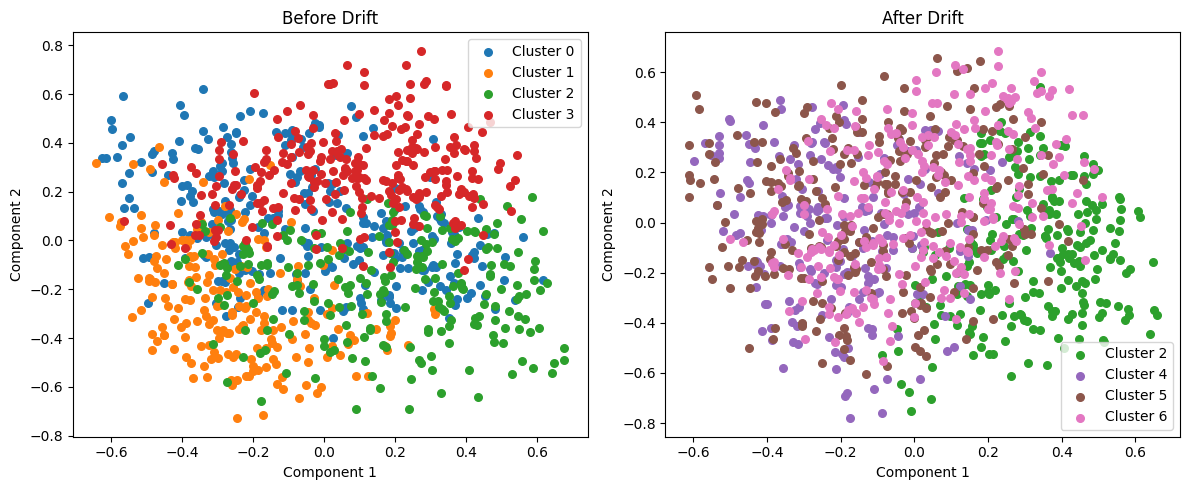

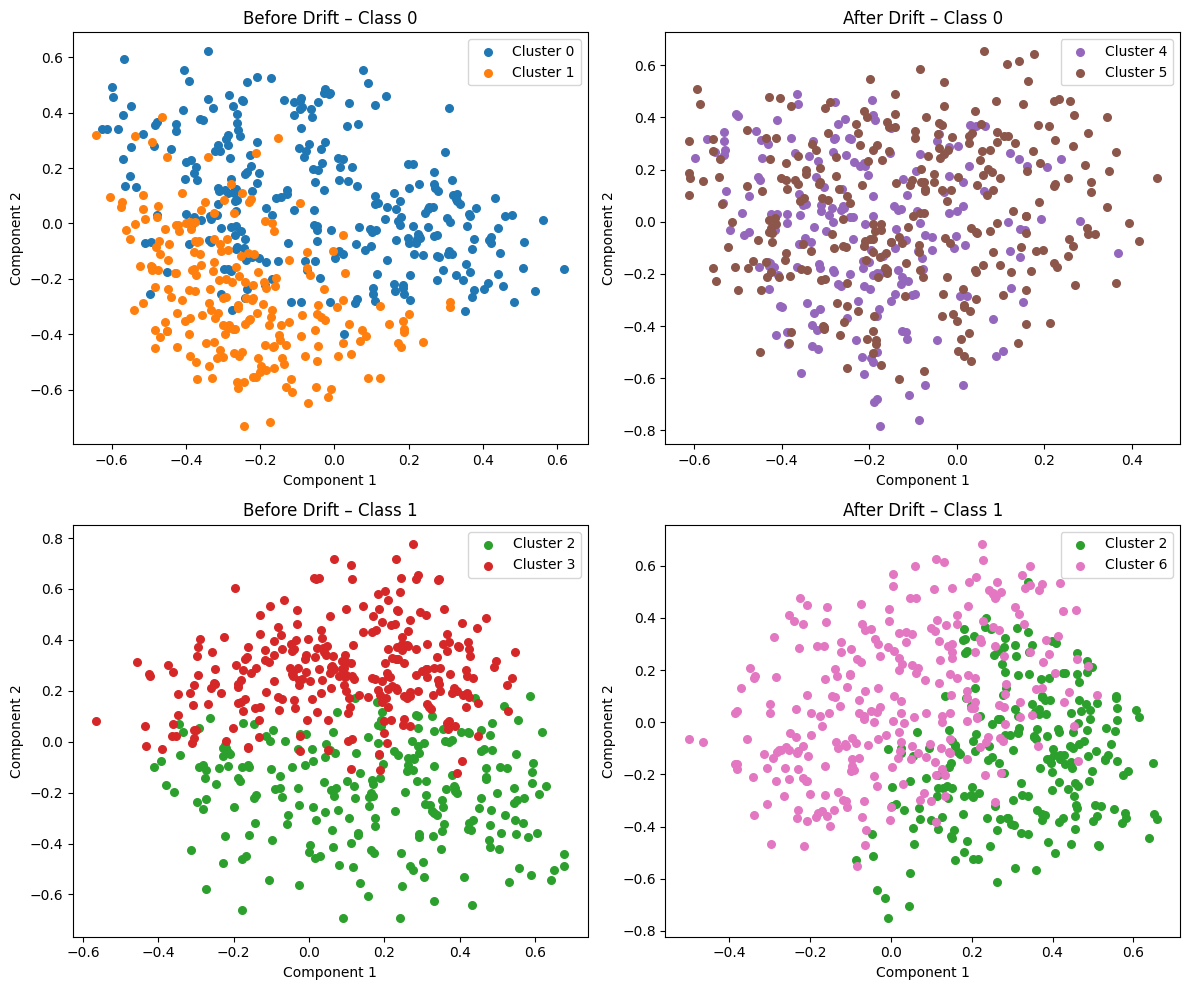

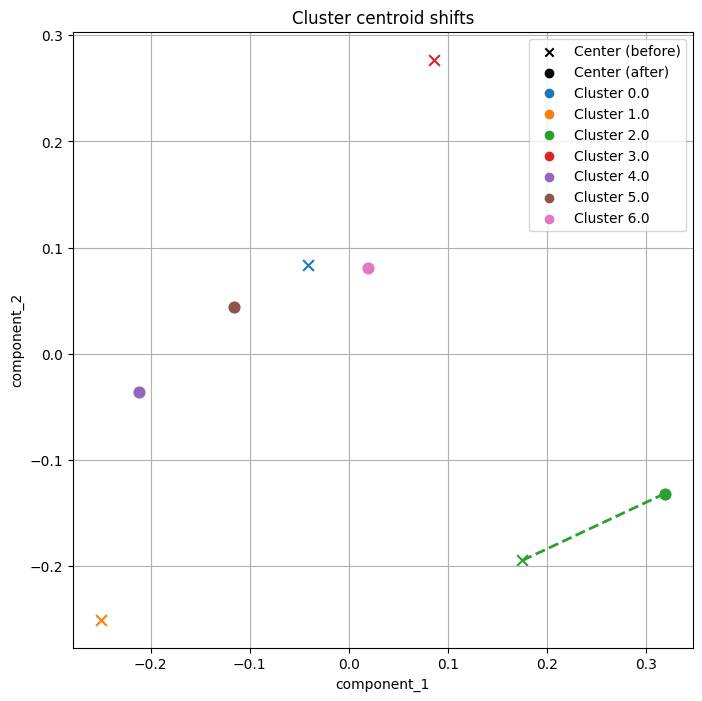

In [34]:
run_experiments_controlled_concept_drift(1000, 4, 2)

**3. Custom concept Drift Default Parameters**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  1 174   5   2]
[  1 101   0   3]
{np.float64(0.0): array([-0.33174208, -0.05761286, -0.41598523, -0.51601243, -0.17385945,
       -0.31704783,  0.54917682,  0.03251214, -0.47485473, -0.34816057,
       -0.31208892]), np.float64(1.0): array([-0.1980968 , -0.31964246, -0.06965707,  0.03802117, -0.27052724,
       -0.26764715, -0.88766016, -0.4216938 , -0.02728749, -0.03975123,
       -0.21072974]), np.float64(2.0): array([ 0.22463781,  0.14440005,  0.19835472,  0.01975053,  0.38738164,
        0.18895801,  0.13475208,  0.17040478,  0.38367829, -0.01515706,
        0.99205315]), np.float64(3.0): array([ 0.35907512,  0.29387147,  0.32580034,  0.51822099,  0.07534731,
        0.47194265,  0.32362685,  0.28771395,  0.11895393,  0.46552709,
       -0.56281862]), np.float64(4.0): None}
{np.float64(1.0): array([ 0.26843816, -0.0227547 ,  0.28262771,  0.23691721,  0.17528387,
       -0.37976224, -0.28488557,  0.09831074, -0.67632423, -0.58745249,
        0.00981659]), np.float64(2.0): array([

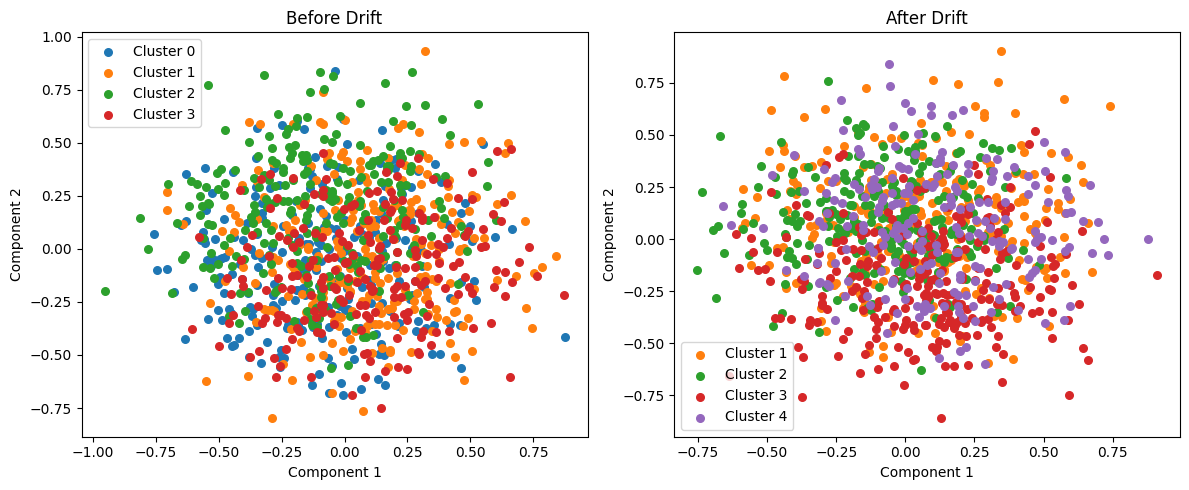

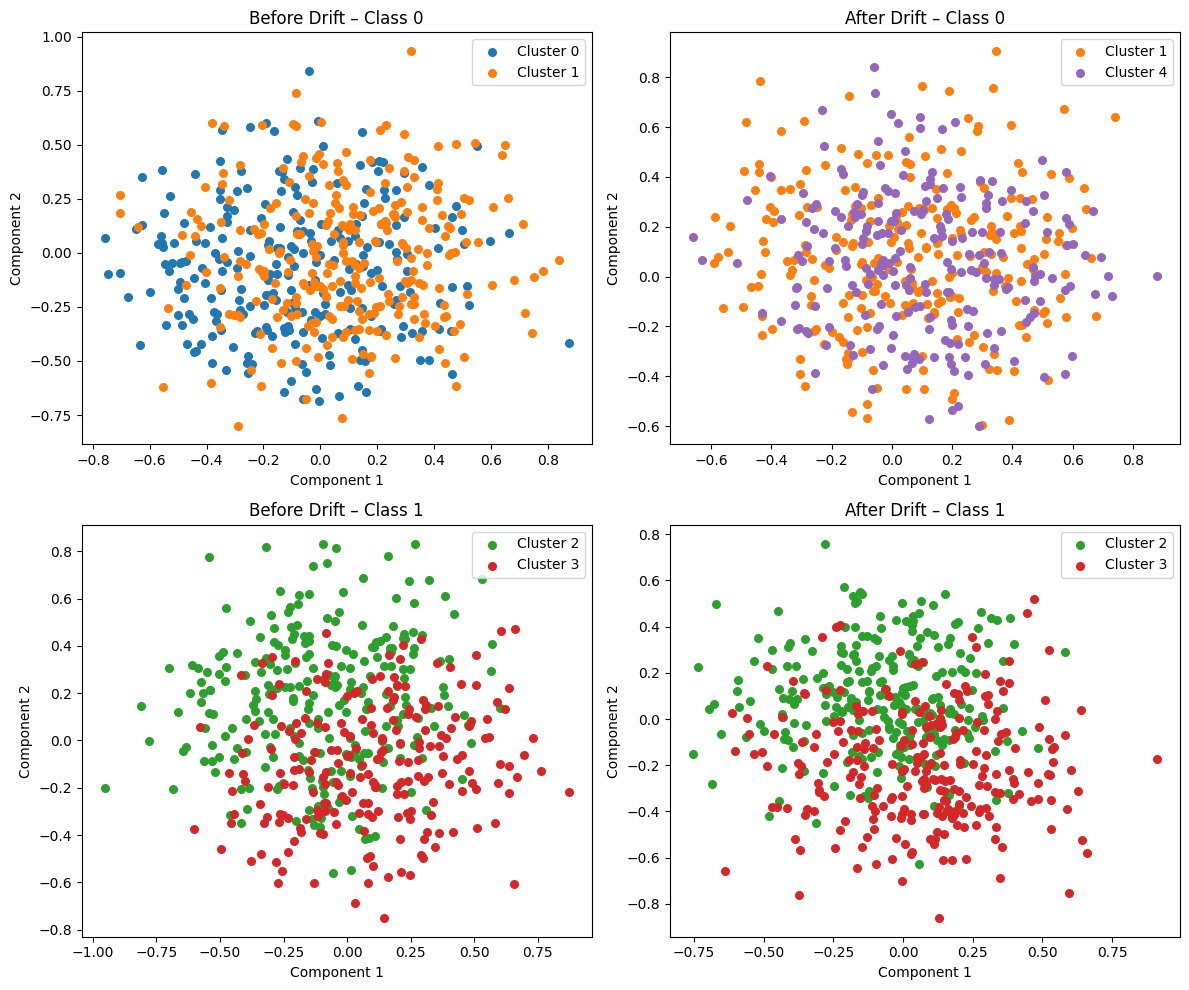

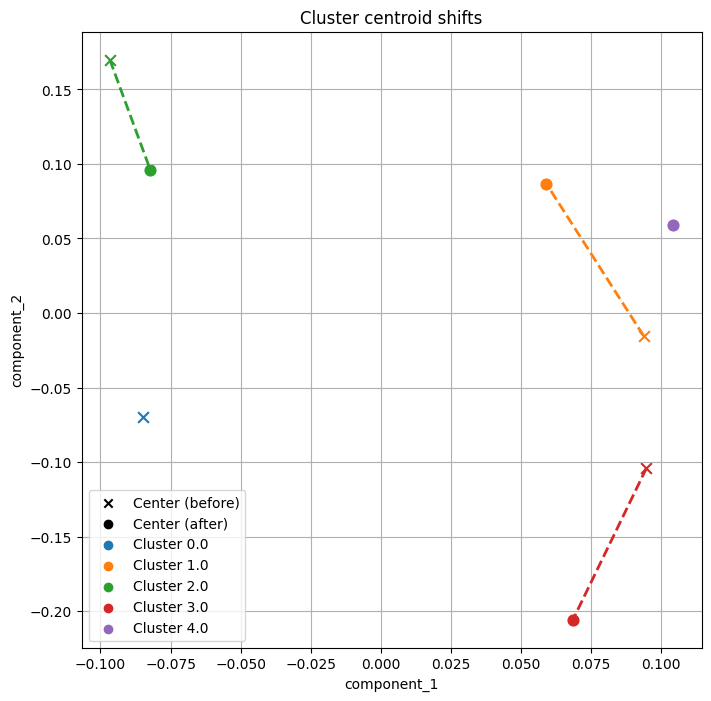

In [35]:
run_experiments_controlled_concept_drift(1000, 11, 5)